# DS 325 - Week 04 - hw

### Learning Objectives:

* Students will learn the motivation for classification techniques.
* Students will be exposed SVM, kNN, decision trees and random forests, and be able to evaluate their relative strengths and weaknesses.
* Students will practice the application of these techniques and visualize their results

# Exercises on classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.svm import SVC                        #SVM "Support vector classifier"
from sklearn import naive_bayes                    #naive bayes classifier
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
plt.style.use('seaborn-pastel')

For these exercises, you will both add on to this Jupyter Notebook to show your work after each corresponding code block comment below.

#### note on the features:

The data set you will classify in this assignment contains the results of a chemical analysis performed on wines produced in the same region of Italy, but derived from three different cultivars. The analysis determined the amounts of thirteen constituents found in the wines.

Note: As the study was not conducted by native English speakers, but as the results are reported in English, the names of the constituents are not all spelled correctly. We we have preserved them as such, so that, if you like, you can more easily find more information about the data online.

The variable that we are trying to predict is **origin**, which takes on one of three possible values, and specifies the cultivar.

**FEATURES**
1. Alcohol: alcohol content, reported in units of ABV (alcohol by volume).
2. Malic acid: one of the principal organic acids found in wine. Although found in nearly every fruit and berry, it’s flavor is most prominent in green apples; likewise, it projects this sour flavor into wine. For more information, feel free to read about acids in wine.
3. Ash: yep, wine has ash in it. Ash is simply the inorganic matter left after evaporation and incineration.
4. Alcalinity [sic] of ash: the alkalinity of ash determines how basic (as opposed to acidic) the ash in a wine is.
5. Magnesium: magnesium is a metal that affects the flavor of wine.
6. Total phenols: Phenols are chemicals that affect the taste, color, and mouthfeel (i.e., texture) of wine. For some (very) in-depth information about phenols, we refer you to phenolic content in wine.
7. Flavoids [sic]: flavonoids are a type of phenol.
8. Nonflavoid [sic] phenols: nonflavonoids are another type of phenol.
9. Proanthocyanins [sic]: proanthocyanidins are yet another type of phenol.
10. Color intensity: the color intensity of a wine: i.e., how dark it is.
11. Hue: the hue of a wine, which is typically determined by the color of the cultivar used (although this is not always the case).
12. Protein: OD280/OD315 of diluted wines.
13. Proline: an amino acid present in wines.

### Exercise  details

Your goal is to build the most accuarat model for the validation set given the limited number of features for each exercise.
**Available models**
* kNN (un-weighted)
* SVM
* Naive-Bayes

A quick spoiler: a naive Bayes model that predicts origin using all the features in this data set will get you pretty much 98% accuracy.

We want to build the best model which balances accuracy and explanatory power. That is, using four or fewer features, build a model that achieves relatively high accuracy, but at the same time is easy to explain. Report the accuracy of your model, and explain how/why it works.

Regardless, we’re going to work on building models with fewer features, so that they are easier to interpret. We’ll begin with a single feature model, and work our way up to four. We also want you to build a model with the exact number of features specified (1, 2, 3, or 4). 

* Each model must have exactly this many **features - not PCA** components.

* For exercise 1, you must build each of the following models: kNN, SVM and Naive-Bayes.

* For each following exercises, you do not need to build each of the models, but you may want to and then choose the one that performs the best.  

* For each model, you should explain which features you chose and why. 

* **Points will be given for classification accuracy, as well as for explanation, per model.**

* The variable that we are trying to predict is **origin**, which takes on one of three possible values, and specifies the cultivar.

* **Note**: that if you do not reach the **full** credit score you will still get credit for your work.  How many points scales with how close you are to that goal.

Before you begin, one quick reminder: Always remember to **evaluate accuracy on the testing data**, not the training data. Otherwise, you will think you are getting a much higher accuracy that you really are. Likewise, you will think you are getting a much higher grade than you really are.


#### Exercise 1: 1-feature model
We’ll start off simple by building one-feature models. Consider what makes cultivars (**origin**) different from one another. Alcohol content is unlikely to make a difference as alcohol is largely a product of the fermentation process. On the other hand, properties intrinsic to the different kinds of grapes may have a larger impact on classification accuracy.
* Build a kNN, SVM and Naive-Bayes classifier
* Full credit achieve 79% or higher.

#### Exercise 2: 2-feature model
Building off of your one-feature model, add a new feature. For some models, it may actually be better to use a new combination of features, but you should still be able to simply add a new feature and increase your accuracy.
* Build any of kNN, SVM and Naive-Bayes classifier
* Full credit achieve 93% or higher.

**skip 3 feature**

#### Exercise 3: 4-feature model
Finally, we’ll finish up by building a model using six features. (i.e., feel free to start over from scratch and choose any 4 features).
* Build any of kNN, SVM and Naive-Bayes classifier
* For full credit achieve 94.6% or higher.



### Summary of best models

**When you've finished**, return here and complete the table with the results for each of your models.

| # features | model | accuracy |
| - | - | - |
| 1 | kNN | 0.793 |
| 1 | SVM | 0.776 |
| 1 | NaiveBayes | 0.793 |
_
| 2 | kNN | ? |
| 2 | SVM | 0.948 |
| 2 | NaiveBayes | ? |
_
| 4 | kNN | ? |
| 4 | SVM | 0.931 |
| 4 | NaiveBayes | ? |

**Note** for the 2 and 4 feature models, you need to only post the classifier that you choose as the best.  


## Exercise 1: 1-feature model

In [2]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")
wineV.head(1)

,origin,alcohol,malic.acid,ash,alcalinity,magnesium,phenols,flavoids,nonflavoids,proanthocyanins,color,hue,protein,proline
0,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.0,3.17,510


## feature selection

#### you may want to start by viewing the correlations between the variables, and then following techniques from class


In [3]:
wineT['origin'].value_counts().to_frame()

,origin
2,46
1,43
3,31


In [4]:
wineT.corr()

,origin,alcohol,malic.acid,ash,alcalinity,magnesium,phenols,flavoids,nonflavoids,proanthocyanins,color,hue,protein,proline
origin,1.000000,-0.376735,0.509489,0.003250,0.594978,-0.204449,-0.699212,-0.831739,0.561759,-0.478455,0.292808,-0.601538,-0.795713,-0.638781
alcohol,-0.376735,1.000000,0.044510,0.214911,-0.310387,0.321071,0.333879,0.261154,-0.204432,0.232203,0.527040,-0.136991,0.159915,0.713624
malic.acid,0.509489,0.044510,1.000000,0.234953,0.338737,-0.013172,-0.372804,-0.451888,0.315168,-0.239362,0.298833,-0.593526,-0.404668,-0.196527
ash,0.003250,0.214911,0.234953,1.000000,0.438503,0.307097,0.126513,0.105277,0.183250,0.040495,0.310064,-0.134283,0.010639,0.211871
alcalinity,0.594978,-0.310387,0.338737,0.438503,1.000000,-0.103393,-0.355573,-0.391446,0.386005,-0.202914,0.090181,-0.299192,-0.330598,-0.434957
magnesium,-0.204449,0.321071,-0.013172,0.307097,-0.103393,1.000000,0.257201,0.233550,-0.244638,0.263462,0.230351,0.016469,0.115385,0.415179
phenols,-0.699212,0.333879,-0.372804,0.126513,-0.355573,0.257201,1.000000,0.862818,-0.495475,0.596333,-0.039100,0.421792,0.714171,0.513950
flavoids,-0.831739,0.261154,-0.451888,0.105277,-0.391446,0.233550,0.862818,1.000000,-0.584681,0.645085,-0.162771,0.544452,0.809004,0.515197
nonflavoids,0.561759,-0.204432,0.315168,0.183250,0.386005,-0.244638,-0.495475,-0.584681,1.000000,-0.373615,0.172490,-0.286739,-0.593151,-0.339571
proanthocyanins,-0.478455,0.232203,-0.239362,0.040495,-0.202914,0.263462,0.596333,0.645085,-0.373615,1.000000,0.041765,0.309216,0.527326,0.365222


##### From heatmap of correlation, we note that these features can be used to predict the origin:
1. flavoids
2. protein
3. phenols
4. proline
5. hue
6. alcalinity
7. malic.acid

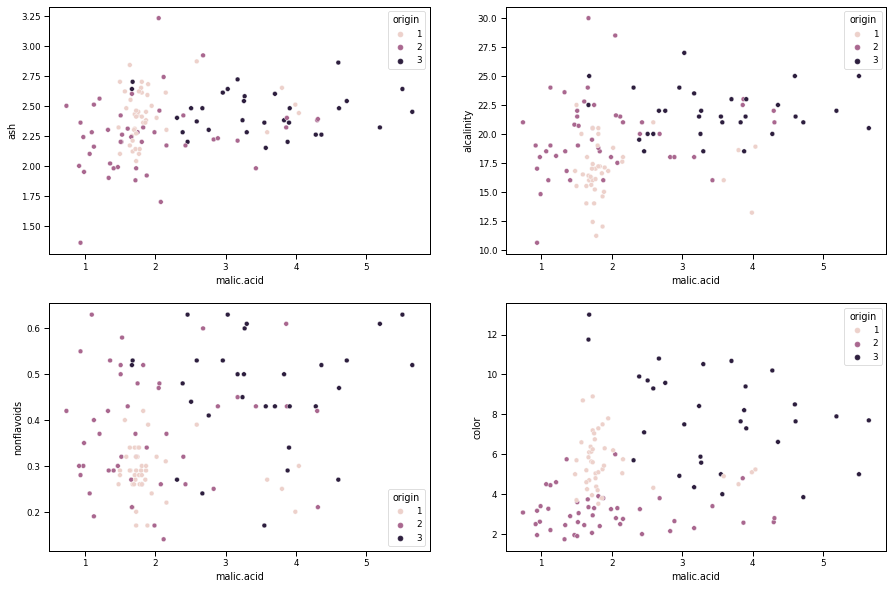

In [5]:
# check correlation b/w malic.acid and others
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.sca(axs[0,0])
sns.scatterplot(x = 'malic.acid', y = 'ash', hue='origin', data = wineT)
plt.sca(axs[0,1])
sns.scatterplot(x = 'malic.acid', y = 'alcalinity', hue='origin', data = wineT)
plt.sca(axs[1,0])
sns.scatterplot(x = 'malic.acid', y = 'nonflavoids', hue='origin', data = wineT)
plt.sca(axs[1,1])
sns.scatterplot(x = 'malic.acid', y = 'color', hue='origin', data = wineT)
plt.show()

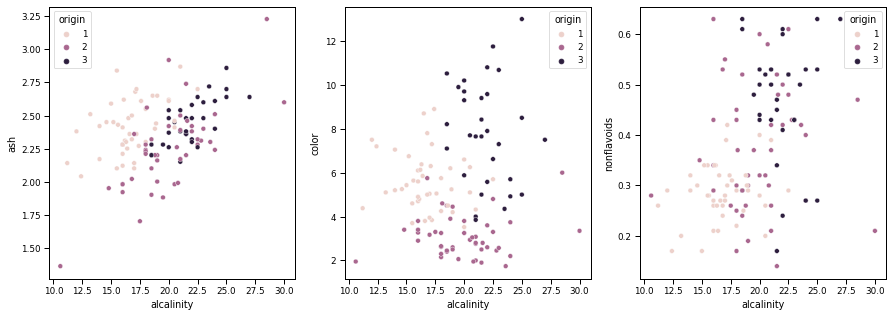

In [6]:
# check correlation b/w alcalinity and others
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
plt.sca(axs[0])
sns.scatterplot(x = 'alcalinity', y = 'ash', hue='origin', data = wineT)
plt.sca(axs[1])
sns.scatterplot(x = 'alcalinity', y = 'color', hue='origin', data = wineT)
plt.sca(axs[2])
sns.scatterplot(x = 'alcalinity', y = 'nonflavoids', hue='origin', data = wineT)
plt.show()

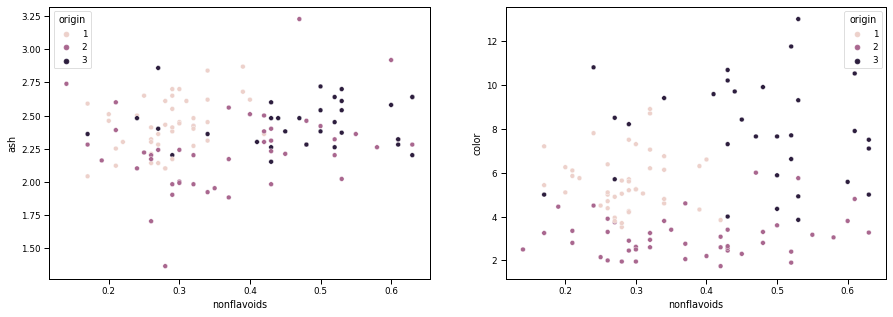

In [7]:
# check correlation b/w nonflavoids and others
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.sca(axs[0])
sns.scatterplot(x = 'nonflavoids', y = 'ash', hue='origin', data = wineT)
plt.sca(axs[1])
sns.scatterplot(x = 'nonflavoids', y = 'color', hue='origin', data = wineT)
plt.show()

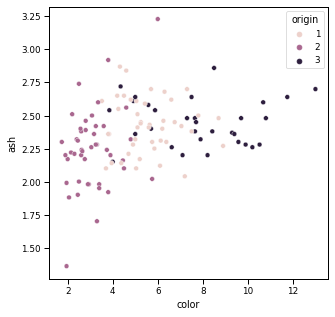

In [8]:
# check correlation b/w color and ash
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.scatterplot(x = 'color', y = 'ash', hue='origin', data = wineT)
plt.show()

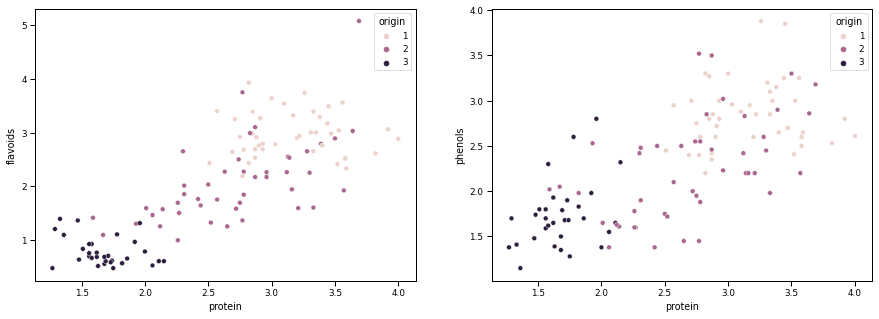

In [9]:
# check correlation b/w protein and others
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
plt.sca(axs[0])
sns.scatterplot(x = 'protein', y = 'flavoids', hue='origin', data = wineT)
plt.sca(axs[1])
sns.scatterplot(x = 'protein', y = 'phenols', hue='origin', data = wineT)
plt.show()

## Exercise 1: 1-feature: knn

In [10]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")


In [11]:
# only one features
#determine top 1 features for first two PCA components
nPCA = 1
X_features = wineT.drop(['origin'], axis=1)
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['flavoids']


In [12]:
scaler = StandardScaler()

y_train = wineT['origin']
X = wineT[['flavoids']]
X_train = scaler.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids']]
X_valid = scaler.transform(X1)


In [13]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy');

grid.fit(X_train, y_train);
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']

k_neighbors= k_cv
knn2 = KNeighborsClassifier(k_neighbors)
knn2.fit(X_train,y_train)
y_pred = knn2.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
print(acc)


kNN best param =  {'n_neighbors': 25}
0.7931034482758621


In [14]:
label = [1, 2, 3]

0.7931034482758621


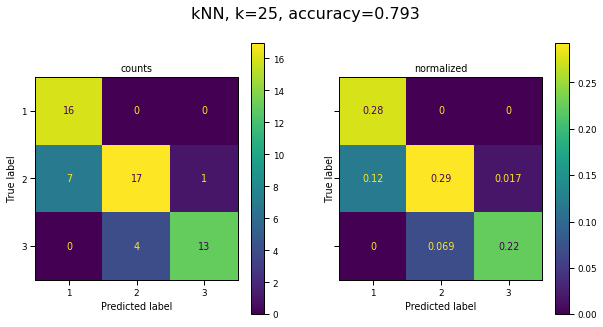

In [15]:
#plot confusion matrix
# k_neighbors= k_cv
# knn2 = KNeighborsClassifier(k_neighbors)
knnBest.fit(X_train,y_train)
y_pred = knnBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
print(acc)
#plot
label = [1, 2, 3]
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]), display_labels=label)
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('kNN, k=25, accuracy=%2.3f'%(acc), fontsize=16);

## For each model, explain which features you chose and why.
- I choose 'flavoids' because the correlation rate between it and origin is the highest with 0.83

## Exercise 1: 1-feature: SVM with kernel

In [16]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

scale = StandardScaler()

y_train = wineT['origin']
X = wineT[['flavoids']]
X_train = scale.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids']]
X_valid = scale.transform(X1)


In [17]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20],               
              'kernel': ['linear']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_) 


SVC(C=0.2, kernel='linear')


0.7758620689655172


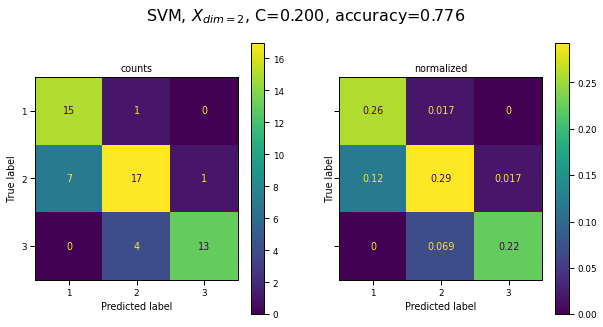

In [18]:
#plot confusion matrix
svc_model = SVC(kernel='linear', C=0.2)
svc_model.fit(X_train, y_train)
y_pred = svmBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
print(acc)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=label)
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('SVM, $X_{dim=2}$, C=%3.3f, accuracy=%2.3f'%(C_cv,acc), fontsize=16);

## Exercise 1: 1-feature: Naive Bayes classifier

In [19]:
#Naive Bayes classifier
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

scaler = StandardScaler()
y_train = wineT['origin']
X = wineT[['flavoids']]
X_train = scaler.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids']]
X_valid = scaler.transform(X1)


In [20]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)

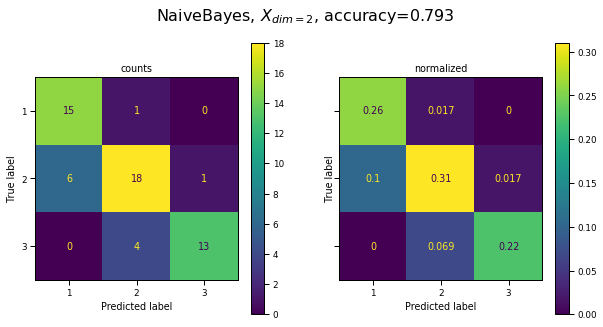

In [21]:
#plot confusion matrix
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=label)
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('NaiveBayes, $X_{dim=2}$, accuracy=%2.3f'%acc, fontsize=16);

## Exercise 2: 2-feature model

In [22]:
label=[1, 2, 3]

In [23]:
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

In [24]:
# select two features
#determine top 2 features for first two PCA components
nPCA = 2
X_features = wineT.drop(['origin'], axis=1)
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['flavoids', 'color']


#### with SVM

In [25]:
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

scaler = StandardScaler()
y_train = wineT['origin']
X = wineT[['flavoids', 'color']]
X_train = scaler.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids', 'color']]
X_valid = scaler.transform(X1)

In [26]:
# defining parameter range 
param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20], 
              'gamma': np.logspace(0.01, 5, 20),
              'kernel': ['linear', 'rbf']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
CscoreM = grid.cv_results_['mean_test_score']
CscoreS = grid.cv_results_['std_test_score']
svmBest = grid.best_estimator_
print(grid.best_estimator_) 


SVC(C=0.2, gamma=1.8734045856593293)


0.9482758620689655


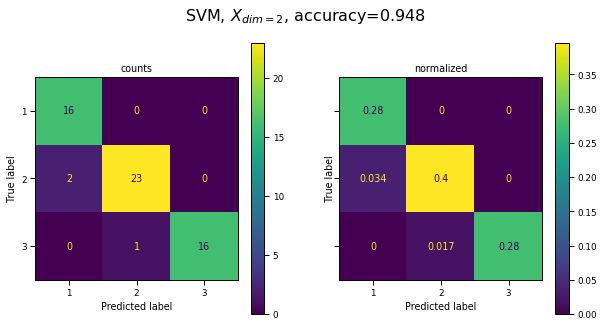

In [27]:
svmBest.fit(X_train, y_train)
y_pred = svmBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)

print(acc)

#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=label)
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle('SVM, $X_{dim=2}$, accuracy=%2.3f'%acc, fontsize=16);

In [28]:
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(acc)

0.9137931034482759


# Comment
I choose flavoids similar to the 1feature work. New feature is color since it correlates to origin, but not to flavoid while return the highest accuracy.

## Exercise 3: 4-feature model

In [29]:
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")


In [30]:
# select four features
nPCA = 4
X_features = wineT.drop(['origin'], axis=1)
X_feat_std = StandardScaler().fit_transform(X_features) 
featureNames = X_features.columns
pca = PCA(n_components=nPCA).fit(X_feat_std)
X_pca = pca.transform(X_feat_std)
most_important = [np.abs(pca.components_[i]).argmax() for i in range(nPCA)]
most_important_names = [featureNames[most_important[i]] for i in range(nPCA)]
print(most_important_names)

['flavoids', 'color', 'ash', 'malic.acid']


In [31]:
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

scale = StandardScaler()
y_train = wineT['origin']
X = wineT[['flavoids', 'color', 'magnesium', 'malic.acid']]
X_train = scale.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids', 'color', 'magnesium', 'malic.acid']]
X_valid = scale.transform(X1)

In [32]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 0, cv=3, scoring='accuracy');
grid.fit(X_train, y_train);
#
print('kNN best param = ',grid.best_params_)
kscoreM = grid.cv_results_['mean_test_score']
kscoreS = grid.cv_results_['std_test_score']
knnBest = grid.best_estimator_
k_cv = grid.best_params_['n_neighbors']
print(k_cv)


kNN best param =  {'n_neighbors': 1}
1


In [33]:
knnBest.fit(X_train, y_train)
y_pred = knnBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
print(acc)

0.9137931034482759


In [34]:
#train classifier
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

scale = StandardScaler()
y_train = wineT['origin']
X = wineT[['flavoids', 'color', 'magnesium', 'malic.acid']]
X_train = scale.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids', 'color', 'magnesium', 'malic.acid']]
X_valid = scale.transform(X1)

gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print(acc)

0.896551724137931


In [35]:
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
wineT = pd.read_csv(web_addr+"wine_region_train.csv")
wineV = pd.read_csv(web_addr+"wine_region_valid.csv")

scale = StandardScaler()
y_train = wineT['origin']
X = wineT[['flavoids', 'color', 'magnesium', 'malic.acid']]
X_train = scale.fit_transform(X)

y_valid = wineV['origin']
X1 = wineV[['flavoids', 'color', 'magnesium', 'malic.acid']]
X_valid = scale.transform(X1)

param_grid = {'C': [0.01,0.02,0.05,0.07,0.08,0.1,0.2,0.5,0.9,1,10,20], 
              'gamma': [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20],
              'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), param_grid, verbose = 0, cv=3, scoring='accuracy');
# fitting the model for grid search 
grid.fit(X_train, y_train);
svmBest = grid.best_estimator_
C_cv = grid.best_params_['C']
gamma_cv = grid.best_params_['gamma']
print(grid.best_estimator_) 

SVC(C=10, gamma=0.5)


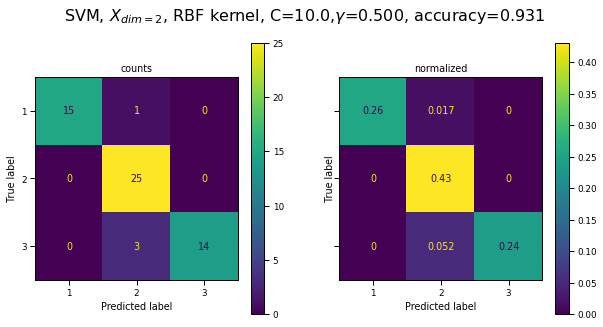

In [36]:
y_pred = svmBest.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
#plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey='row')
cmd = ConfusionMatrixDisplay(cm, display_labels=label)
cmd.plot(ax=axes[0])
axes[0].set_title('counts')
cmd = ConfusionMatrixDisplay(cm/np.sum(cm[:]),display_labels=label)
cmd.plot(ax=axes[1])
axes[1].set_title('normalized')
fig.suptitle(r'SVM, $X_{dim=2}$, RBF kernel, C=%3.1f,$\gamma$=%3.3f, accuracy=%2.3f'%(C_cv,gamma_cv,acc), fontsize=16);

### Comment
From list of 8 with high correlate, I eleminated those that highly correlate with flavoids:
- protein
- phenols
- hue
- proline
- alcanity

Next, I have to choose another 2 features (color and magnesium) since they have a good corr with origin but not too correlate with flavoids


## Exercise 4a: short answer
use the space below to answer the following questions regarding the figure below. No code necessary below.

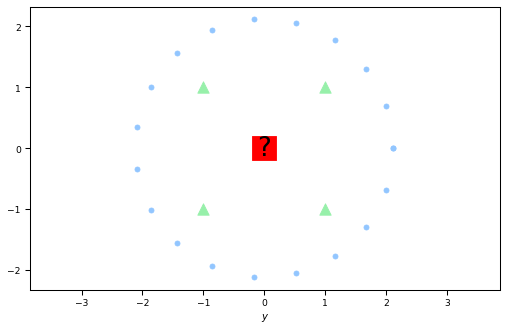

In [37]:
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 20)
x1, y1 = 1.5*np.sqrt(2)*np.cos(theta), 1.5*np.sqrt(2)*np.sin(theta)
x2 = [-1,-1,1,1]; y2 = [-1,1,-1,1]
mk = ['o','^']
fig = plt.figure(figsize = (8.1,5),dpi=75)
plt.scatter(x1,y1,marker='o')
plt.scatter(x2,y2,marker='^',s=120)
plt.scatter(0,0,marker='s',color='r',s=500)
plt.text(0, 0,"?",ha='center',va='center',size=25)
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.axis('equal');plt.show()
#plt.xlim([0.8,2.2]);plt.ylim([0.8,2.2]);

Use the above figure for the following questions.
        
    i. If you trained a kNN classifier on the above, what class would be predicted for the query location? Think about this carefully.
    ii. If you trained a Naive-Bayesian classifier on the above, what class would be predicted for the query location?

#### your answers here
i. if $1<k<4+4$, then result is triangle, if $k\geq8$, then circle. It is because knn classifies based on the number of nearest n_neighbors.
- In case k ranges from $1$ to $7$, triangles are dominant nearest neighbors
- k greater than $7$, circles start to dominate, so the result is circle

ii. Query can be circle
- P(y=0|c=circle) = 2/20
- P(x=0|c=circle) = 1/20
- P(y=0|c=triangle) = 0/4
- P(x=0|c=triangle) = 0/4
- So, probability of being circle is higher than triangle  

In [38]:
theta = np.linspace(0, 2*np.pi, 20)
x1, y1 = 1.5*np.sqrt(2)*np.cos(theta), 1.5*np.sqrt(2)*np.sin(theta)
x2 = [-1,-1,1,1]; y2 = [-1,1,-1,1]
df = pd.DataFrame({'x':x1, 'y':y1})
df2 = pd.DataFrame({'x':x2, 'y':y2})
df3 = df.append(df2)
type = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1]
df3['type'] = type
label = ['blue', 'orange']
X = df3[['x', 'y']]
y = df3['type']
X_test = [[0, 0]]

for i in range(10):
  knn = KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X, y)
  y_pred = knn.predict(X_test)
  print(f'knn: {label[y_pred[0]]} (k={i+1})')


gnb = naive_bayes.GaussianNB()
gnb.fit(X, y)
y_pred1 = gnb.predict(X_test)
print(f'Naive-Bayesian - {label[y_pred[0]]}')

knn: orange (k=1)
knn: orange (k=2)
knn: orange (k=3)
knn: orange (k=4)
knn: orange (k=5)
knn: orange (k=6)
knn: orange (k=7)
knn: blue (k=8)
knn: blue (k=9)
knn: blue (k=10)
Naive-Bayesian - blue


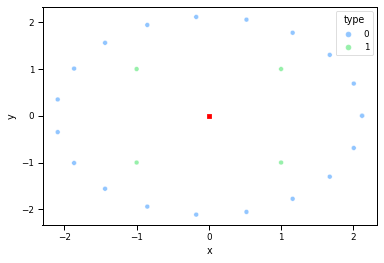

In [39]:
plt.scatter(0,0,marker='s',color='r')
sns.scatterplot(x = df3['x'], y = df3['y'], hue=df3['type'])
plt.show()

## Exercise 4b: short answer

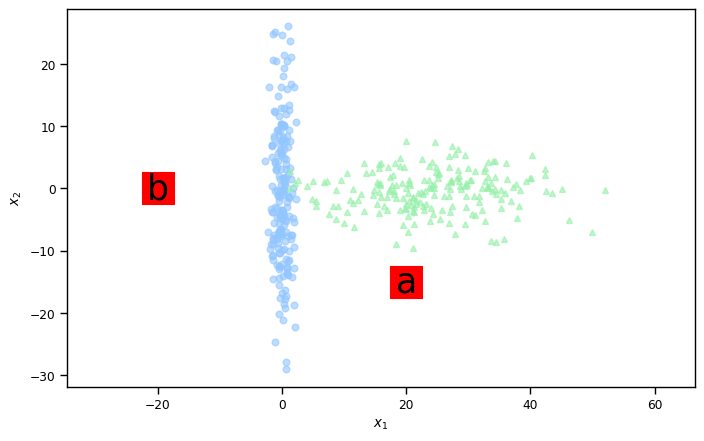

In [40]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
N=200
mu1 = [0, 0]
cov1 = [[1, 0], [0, 120]]  # diagonal covariance
mu2 = [25, 0]
cov2 = [[100, 0], [0, 10]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mu1,cov1, N).T
x2, y2 = np.random.multivariate_normal(mu2,cov2, N).T
fig = plt.figure(figsize=(8.1,5),dpi=100)
plt.plot(x1, y1, 'o',alpha=0.6)
plt.plot(x2, y2, '^',alpha=0.6)
#-------
xA=[20,-15]
xB=[-20,0]
plt.scatter(xA[0],xA[1],marker='s',color='r',s=500)
plt.text(xA[0],xA[1],"a",ha='center',va='center',size=25)
plt.scatter(xB[0],xB[1],marker='s',color='r',s=500)
plt.text(xB[0],xB[1],"b",ha='center',va='center',size=25)
plt.xlim(-25,65);plt.ylim(-35,35)
plt.axis('equal')
plt.xlabel('$x_1$');plt.ylabel('$x_2$')
plt.show()

Suppose you trained a Bayes Classifier using general Gaussians on the following data. The blue circles are class (1) and the orange triangles are class (2). Use your understanding of clustering to answer the following. No need for code.

    i. What class would the Bayes classifier predict for test example a? (Don't waste time calculating, but do provide your reasoning).
    ii. What class would be predicted for test example b?

#### your answers here
i. A is triangle. Because A is closer to triangles
     
ii. Predict: B is triangle since it takes less steps for triangle cluster to reach B than number of steps of circle cluster to reach B

In [41]:
np.random.seed(0)
N=200
mu1 = [0, 0]
cov1 = [[1, 0], [0, 120]]  # diagonal covariance
mu2 = [25, 0]
cov2 = [[100, 0], [0, 10]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mu1,cov1, N).T
x2, y2 = np.random.multivariate_normal(mu2,cov2, N).T
type1 = np.zeros((200))
type2 = np.ones((200))
df = pd.DataFrame({'x':x1, 'y':y1, 'type': type1})
df2 = pd.DataFrame({'x':x2, 'y':y2, 'type': type2})
df3 = df.append(df2)
label = ['blue', 'orange']

X = df3[['x', 'y']]
y = df3['type']
X_test = [[-20, 0]]
X_test1 = [[-15, 20]]

gnb = naive_bayes.GaussianNB()
gnb.fit(X, y)
y_pred1 = gnb.predict(X_test).astype(int)
y_pred2 = gnb.predict(X_test1).astype(int)
print(f'Naive-Bayesian: B - {label[y_pred1[0]]}')
print(f'Naive-Bayesian: A - {label[y_pred2[0]]}')

Naive-Bayesian: B - orange
Naive-Bayesian: A - orange


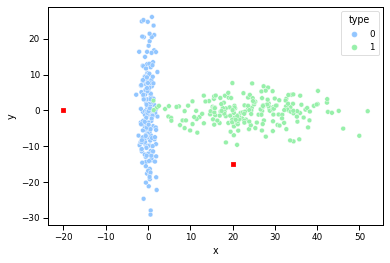

In [42]:
plt.scatter(-20,0,marker='s',color='r')
plt.scatter(20,-15,marker='s',color='r')
sns.scatterplot(x = df3['x'], y = df3['y'], hue=df3['type'].astype(int))
plt.show()

## Exercises on Decision trees and Random forests

The goal of this week's project is to build simple classifiers that can be trained from data. 

For each of the following datasets (rice, yeast, and eyeDetection), do the following:

    a. Divide the data into a training and test set, using the following code
    
`X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)`

    b. Build a **decision tree** for the target variable (class). 

    c. Build a randomForest.  Use gridSearchCV to find the forest that gives the best cv score.

    d. Report the accuracy and display the confusion matrix for both your decision tree and random forest.  Compare the results.  

        a. Comment on the results. Which performed the best? 
        b. Why (based on data) do you think this was the case?
        
    e. For **rice only**, plot the decision tree.

### gridsearchCV
When your trying to find the best random forest, you may want to include some (but not all) of the following parameters:
* **n_estimators** = number of trees in the ensemble.
* **max_depth** = [int] maximum number of levels allowed in each tree.
* **min_samples_leaf** = [int] minimum number of samples which can be stored in a tree leaf.
* **max_features** = ["auto", "sqrt", "log2"] maximum number of features considered when splitting a node.
* **bootstrap** = [True, False], Whether bootstrap samples are used when building trees. Setting bootstrap = False 
* **min_samples_split** = [int] minimum number of samples necessary in a node to cause node splitting.
causes no subsampling of the data
* **criterion** = ['gini' or 'entropy'] the function used to evaluate the quality of a split. 

I've sorted these from ones you'll want to include in your gridSearchCV to ones that likely won't make a large difference (or just set to what works better).

You definitely dont want to explore all these in your gridSearch. Review how we did this during class. Choose wisely!

### accuracy    

Your target goals for the **RandomForest accuracy** on the test set are

| Exercise | accuracy goal|
| :- | - |
| 1. rice |  >0.93 |
| 2. yeast |  >0.62 |
| 3. eyeDetection |  >0.92 |



### summary for exercises 5-7
Fill in the tables below, when you've finished with the assignment.

**Exercise 5: rice**

| Exercise 5 | kNN | decision tree | random forest |
| :- | - |- |- |
| accuracy | 0.882 | 0.928 | 0.931 |

**Exercise 6: yeast**

| Exercise 6 | kNN | decision tree | random forest |
| :- | - |- |- |
| accuracy | 0.610 | 0.594 | 0.63 |

**Exercise 7: eye**

| Exercise 7 | kNN | decision tree | random forest |
| :- | - |- |- |
| accuracy | 0.975 | 0.835 | 0.925 |

## load libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance
from sklearn import tree
import graphviz
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
import warnings 
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xgboost'

## Exercise 5: rice

### Rice Data Set Information:

Among the certified rice grown in TURKEY, the Osmancik species, which has a large planting area since 1997 and the Cammeo species grown since 2014 have been selected for the study. When looking at the general characteristics of Osmancik species, they have a wide, long, glassy and dull appearance. When looking at the general characteristics of the Cammeo species, they have wide and long, glassy and dull in appearance. A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.


#### Attribute Information:

1. Area: Returns the number of pixels within the boundaries of the rice grain.
2. Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
3. Major Axis Length: The longest line that can be drawn on the rice grain, i.e. the main axis distance, gives.
4. Minor Axis Length: The shortest line that can be drawn on the rice grain, i.e. the small axis distance, gives.
5. Eccentricity: It measures how round the ellipse, which has the same moments as the rice grain, is.
6. Convex Area: Returns the pixel count of the smallest convex shell of the region formed by the rice grain.
7. Extent: Returns the ratio of the regionformed by the rice grain to the bounding box pixels.
8. Class: Cammeo and Osmancik rices

CINAR, I. and KOKLU, M., (2019). “Classification of Rice Varieties Using Artificial Intelligence Methods.” International Journal of Intelligent Systems and Applications in Engineering, 7(3), 188-194.

DOI: https://doi.org/10.18201/ijisae.2019355381

In [ ]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"rice.csv")
df.head(1)

,area,perimeter,majoraxis,minoraxis,eccetricity,convexArea,extent,class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo


In [ ]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"rice.csv")
# display(df.info())
#prepare the data, split into train and test
class_names = ['cammeo','osmancik']
features = df.columns[:-1].tolist()
print(features)
X = df[features] 
y = df['class'] 
cn = np.unique(y)
#split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)
#scale X
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

['area', 'perimeter', 'majoraxis', 'minoraxis', 'eccetricity', 'convexArea', 'extent']


#### knn, decision tree, random forest

In [ ]:
#decision tree
clf = DecisionTreeClassifier(random_state = 0, max_depth=5)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
cm = confusion_matrix(y_test, predicted)
acc = accuracy_score(y_test, predicted)
print(acc)

0.9282589676290464


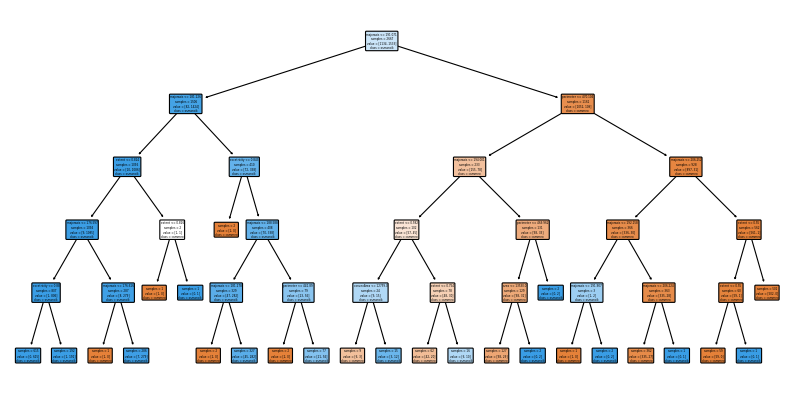

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=100)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=class_names,
               filled = True,rounded=True,impurity = False,proportion = False);
plt.show()

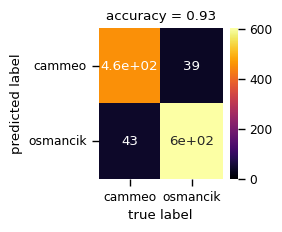

In [ ]:
fig, ax = plt.subplots(figsize=(2, 2),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
#random forest max_depth
clf = RandomForestClassifier(n_estimators=100,random_state=0,min_samples_split=5, max_depth=3)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, predicted)

print(acc)

0.9308836395450568


In [ ]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [6,8],
    'max_features': [3,7],
    'n_estimators': [40,60,80,100,150,200,400],
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;

#Fitting 3 folds for each of 32 candidates, totalling 96 fits
#{'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'n_estimators': 80}

# 'criterion':['gini','entropy'],'max_depth': [6,8],'max_features': [3,7],'n_estimators': [40,60,80,100,150,200,400]
# Fitting 3 folds for each of 56 candidates, totalling 168 fits
# {'criterion': 'entropy', 'max_depth': 6, 'max_features': 7, 'n_estimators': 400}


Fitting 3 folds for each of 56 candidates, totalling 168 fits
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 7, 'n_estimators': 400}


In [ ]:
clf = RandomForestClassifier(n_estimators=400,random_state=0, max_depth=6, max_features=7, criterion='entropy')
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)

print(acc)

0.9282589676290464


#### plot the confusion matrices for each

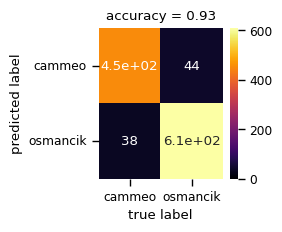

In [ ]:
#plot the confusion matrices for the decision tree and random forest, include each accuracy in the title
fig, ax = plt.subplots(figsize=(2, 2),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

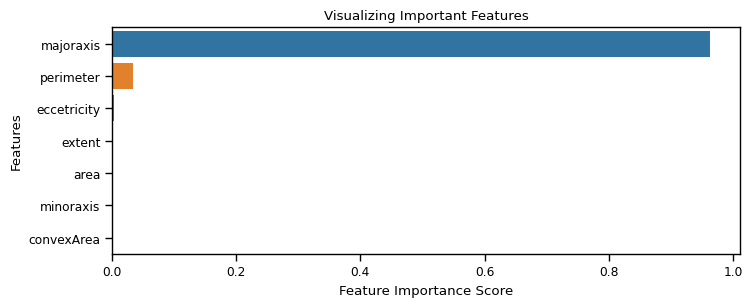

In [ ]:
#plot feature importance barplot
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Comment
- Random Forest returns high accuracy
- I think the reason is that I passed KNN only 1 hyperparameter while passing Random Forest much more hyperparameters. With that much, Random Forest can easily reach the higher accuracy

## Exercise 6: yeast classification

Predicted Attribute: Localization site of protein. ( non-numeric ).

The references below describe a predecessor to this dataset and its development. They also give results (not cross-validated) for classification by a rule-based expert system with that version of the dataset.

### Attribute Information:

1. Sequence Name: Accession number for the SWISS-PROT database
2. mcg: McGeoch's method for signal sequence recognition.
3. gvh: von Heijne's method for signal sequence recognition.
4. alm: Score of the ALOM membrane spanning region prediction program.
5. mit: Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
6. erl: Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
7. pox: Peroxisomal targeting signal in the C-terminus.
8. vac: Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
9. nuc: Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.

#### Class Distribution. The class is the localization site. Please see Nakai & Kanehisa referenced above for more details.
    CYT (cytosolic or cytoskeletal)                    463
    NUC (nuclear)                                      429
    MIT (mitochondrial)                                244
    ME3 (membrane protein, no N-terminal signal)       163
    ME2 (membrane protein, uncleaved signal)            51
    ME1 (membrane protein, cleaved signal)              44
    EXC (extracellular)                                 37
    VAC (vacuolar)                                      30
    POX (peroxisomal)                                   20
    ERL (endoplasmic reticulum lumen)                    5


     Kenta Nakai
         Institue of Molecular and Cellular Biology
     Osaka, University
     1-3 Yamada-oka, Suita 565 Japan
     nakai@imcb.osaka-u.ac.jp
[http://www.imcb.osaka-u.ac.jp/nakai/psort.html](http://www.imcb.osaka-u.ac.jp/nakai/psort.html)
   
    Donor: Paul Horton (paulh@cs.berkeley.edu)
    Date:  September, 1996
    
* Reference: "Expert Sytem for Predicting Protein Localization Sites in Gram-Negative Bacteria", Kenta Nakai & Minoru Kanehisa, PROTEINS: Structure, Function, and Genetics 11:95-110, 1991.

* Reference: "A Knowledge Base for Predicting Protein Localization Sites in Eukaryotic Cells", Kenta Nakai & Minoru Kanehisa, Genomics 14:897-911, 1992.

In [ ]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"yeast.csv")
df.head(1)

,SequenceName,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT


In [ ]:
df = df.drop(['SequenceName'], axis=1)
df.head(1)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT


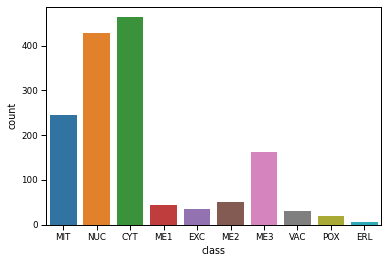

In [ ]:
sns.countplot(x=df['class'])
plt.show()

#### Prepare the dataset

In [ ]:
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"yeast.csv")
df = df.drop(['SequenceName'], axis=1)

features = df.columns[:-1].tolist()
class_names=np.unique(df['class'])
X = df[features] 
y = df['class'] 
cn = np.unique(y)
#split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)
#scale X
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#### decision tree, random forest

In [ ]:
#decision tree
clf = DecisionTreeClassifier(random_state = 0, max_depth=5, min_samples_split=10)
clf.fit(X_train_std, y_train)
predicted = clf.predict(X_test_std)
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)
print(acc)

0.594170403587444


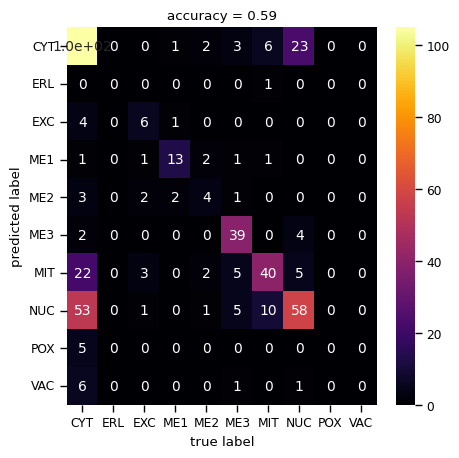

In [ ]:
#plot the confusion matrices for the decision tree and random forest, include each accuracy in the title
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [ ]:
#random forest
clf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=9,min_samples_split=5)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, predicted)

print(acc)

0.6367713004484304


In [ ]:
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [7, 9, 15],
    'max_features': [3,7],
    'min_samples_split' : [5, 10],
    'n_estimators': [40,60,80,100,150,200,400]
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;

# 'criterion':['gini','entropy'],'max_depth': [7, 9, 15],'max_features': [3,7],'min_samples_split' : [5, 10],'n_estimators': [40,60,80,100,150,200,400]
# Fitting 3 folds for each of 168 candidates, totalling 504 fits
# {'criterion': 'gini', 'max_depth': 9, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 60}


Fitting 3 folds for each of 168 candidates, totalling 504 fits
{'criterion': 'gini', 'max_depth': 9, 'max_features': 3, 'min_samples_split': 5, 'n_estimators': 60}


In [ ]:
#random forest
clf = RandomForestClassifier(criterion='gini',n_estimators=60,random_state=0,max_depth=9,min_samples_split=5, max_features=3)
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc)

0.6322869955156951


#### plot the confusion matrices for each

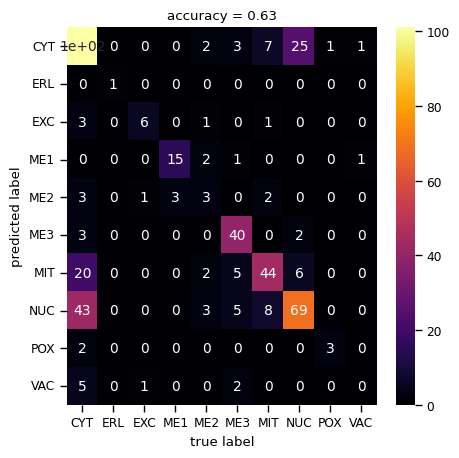

In [ ]:
#plot the confusion matrices, (decision tree, random forest), include each accuracy in the title
#plot the confusion matrices for the decision tree and random forest, include each accuracy in the title
fig, ax = plt.subplots(figsize=(5, 5),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

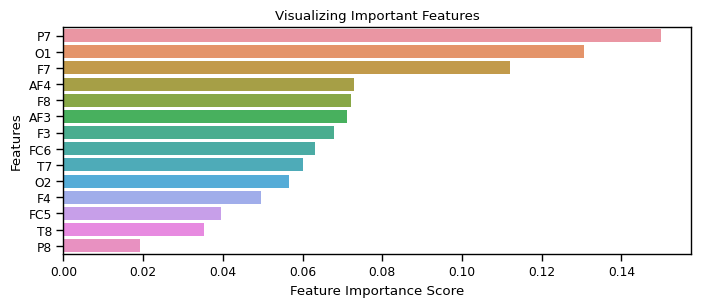

In [ ]:
#visualize most important features
#plot feature importance barplot
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Comment
- The best model is Random Forest
- In this case, KNN is not the highest because I did not choose suitable n_neighbors while I pass various hyperparameters to Random Forest, which helps it maximize the accuracy

## Exercise 7: eyeDetection

Predict if a persons eyes are open or closed based on EEG data.

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

### Attribute Information:

RELATION EEG_DATA

1. AF3 NUMERIC
2. F7 NUMERIC
3. F3 NUMERIC
4. FC5 NUMERIC
5. T7 NUMERIC
6. P7 NUMERIC
7. O1 NUMERIC
8. O2 NUMERIC
9. P8 NUMERIC
10. T8 NUMERIC
11. FC6 NUMERIC
12. F4 NUMERIC
13. F8 NUMERIC
14. AF4 NUMERIC
15. eyeDetection {0,1}

#### Data Set Information:

This database 
        
    Oliver Roesler, it12148 '@' lehre.dhbw-stuttgart.de , Baden-Wuerttemberg Cooperative State University (DHBW), 
    Stuttgart, Germany

[https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State)


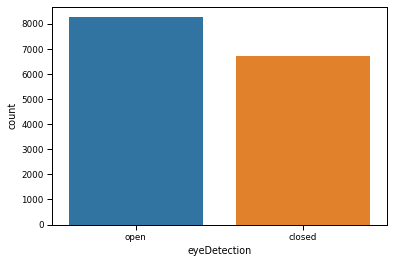

In [ ]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"eye.csv")
# print(df.info())
features = df.columns[:-1].tolist()
class_names = ['open','closed'] #'1' indicates the eye-closed and '0' the eye-open state
ax = sns.countplot(x=df['eyeDetection'])
ax.set(xticklabels=class_names)
plt.show()

#### Prepare the dataset

In [ ]:
#load the data
web_addr = 'http://public.gettysburg.edu/~jpuckett/ds325/data/'
df = pd.read_csv(web_addr+"eye.csv")
features = df.columns[:-1].tolist()
class_names = ['open','closed'] #'1' indicates the eye-closed and '0' the eye-open state

#prepare the dataset, split into train and test
X = df[features] 
y = df['eyeDetection'] 
#split into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0,shuffle=True)
#scale X
sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train_std,y_train)
y_pred = knn2.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9581664441477525


#### decision tree, random forest

In [ ]:
#decision tree
clf = DecisionTreeClassifier(random_state = 0, max_depth=17)#, min_samples_split=20)
clf.fit(X_train_std, y_train)
predicted = clf.predict(X_test_std)
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)

print(acc)

0.835781041388518


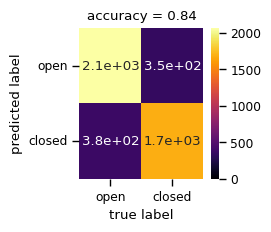

In [ ]:
#plot the confusion matrices for the decision tree and random forest, include each accuracy in the title
fig, ax = plt.subplots(figsize=(2, 2),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Random Forest

In [ ]:
param_grid = {
    'criterion':['gini'],
    'max_depth': [5, 10, 15, 20, 25],  # 18
    'max_features': [5, 7, 10, 15, 20], #9
    'n_estimators': [100, 150, 200],  #165
}
#Random forest classifier
clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2,scoring='accuracy')
grid_search.fit(X_train_std, y_train)
print(grid_search.best_params_)
clf_best = grid_search.best_estimator_;
#Fitting 3 folds for each of 32 candidates, totalling 96 fits
#{'criterion': 'gini', 'max_depth': 8, 'max_features': 7, 'n_estimators': 80}

# Fitting 3 folds for each of 72 candidates, totalling 216 fits
# {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'n_estimators': 60}
#'criterion':['gini','entropy'], 'max_depth': [1, 2, 3],'max_features': [3,7, 14], 'n_estimators': [40,60,80,100],

# 'criterion':['gini'],'max_depth': [5, 10, 15, 20, 25],  # 18 'max_features': [5, 7, 10, 15, 20], #9 'n_estimators': [100, 150, 200],  #165
# Fitting 2 folds for each of 75 candidates, totalling 150 fits
# {'criterion': 'gini', 'max_depth': 25, 'max_features': 5, 'n_estimators': 150}


Fitting 2 folds for each of 75 candidates, totalling 150 fits
{'criterion': 'gini', 'max_depth': 25, 'max_features': 5, 'n_estimators': 150}


In [ ]:
#random forest
clf = RandomForestClassifier(n_estimators=150,random_state=0,max_depth=25,max_features=5, criterion='gini')
clf.fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, predicted)

print(acc)

0.9252336448598131


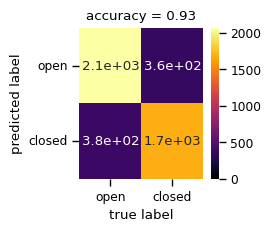

In [ ]:
#plot the confusion matrices for the decision tree and random forest, include each accuracy in the title
fig, ax = plt.subplots(figsize=(2, 2),dpi= 100)
ax =sns.heatmap(cm,annot = True,cmap = "inferno",vmin=0,xticklabels=class_names,yticklabels=class_names)
plt.yticks(rotation=0) 
plt.title('accuracy = %2.2f'%acc)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

#### plot the confusion matrices for each

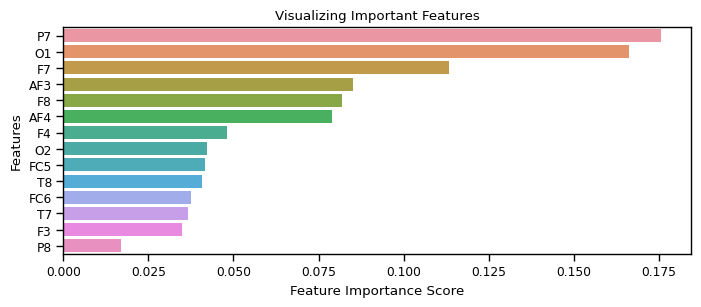

In [ ]:
#plot feature importance barplot
feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
# Creating a bar plot
fig, ax = plt.subplots(figsize=(8.1, 3),dpi= 100)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Comment
- KNN results the highest accuracy
- I believe Decision Tree can reach as high as KNN, that is why my Random Forest is that high although Decision Tree is less than 85%. In this case, I think Decision Tree is not highest because I did not choose correct hyperparameters while Random Forest is mean of all Decision Tree

## Exercise 8: Diagnose diabetes

Compute by hand the which feature should be the root node for the decision tree given the training examples for the diabetes target shown in the table below. Show all work.

|Blood pressure|2hr serum insulin|2hr plasma glucose|diabetes|
|-|-|-|-|
|low|low|low|false|
|low|low|high|false|
|low|low|high|true|
|low|low|low|false|
|low|high|high|false|
|high|low|low|false|
|high|low|high|true|
|high|high|low|true|
|high|low|low|true|
|high|high|high|true|

#### If you prefer, you can do the work by hand, scan or take a photo of your work and upload it.  If that is the case, make a note here.  But do include your final numbers in the bottom table.

#### Or, you can use the following tables to show your work.  


| feature | low and true | low and false         
| :- |-------------: | :-:
|BP| 1 | 4 |
|insulin| 3 | 4 |
|glucose| 2 | 3 |



| feature | high and true | high and false         
| :- |-------------: | :-:
|BP| 4 | 1 |
|insulin| 2 | 1 |
|glucose| 3 | 2 |



| feature | sum | total |       
| :- |-------------: | -------------: 
|BP| ? | ? |
|insulin|  ? | ? |
|glucose| ? | ? |


The best root node is BP.



The lowest entropy is BP:

BP $ =\frac{5}{10} \left( -\frac{1}{5} log_2 \frac{1}{5} \right) + \frac{5}{10} \left( -\frac{4}{5} log_2 \frac{4}{5} \right) + \frac{5}{10} \left( -\frac{4}{5} log_2 \frac{4}{5} \right) + \frac{5}{10} \left( -\frac{1}{5} log_2 \frac{1}{5} \right) = 0.722$

Insulin $ =\frac{7}{10} \left( -\frac{3}{7} log_2 \frac{3}{7} \right) + \frac{7}{10} \left( -\frac{4}{7} log_2 \frac{4}{7} \right) + \frac{3}{10} \left( -\frac{2}{3} log_2 \frac{2}{3} \right) + \frac{3}{10} \left( -\frac{1}{3} log_2 \frac{1}{3} \right) = 0.965$

Glucose $ =\frac{5}{10} \left( -\frac{2}{5} log_2 \frac{2}{5} \right) + \frac{5}{10} \left( -\frac{3}{5} log_2 \frac{3}{5} \right) + \frac{5}{10} \left( -\frac{3}{5} log_2 \frac{3}{5} \right) + \frac{5}{10} \left( -\frac{2}{5} log_2 \frac{2}{5} \right) = 0.971$
